## Principle Component Analysis

The goal of this notebook is to provide a simple data set and visualization for the application of the principle componenet analysis (PCA) method for dimensionality reduction and feature extraction.

### Step 1: Create some dummy data

We'll keep things 2D for simpler visualization:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# inline visualization of the plots
%matplotlib inline

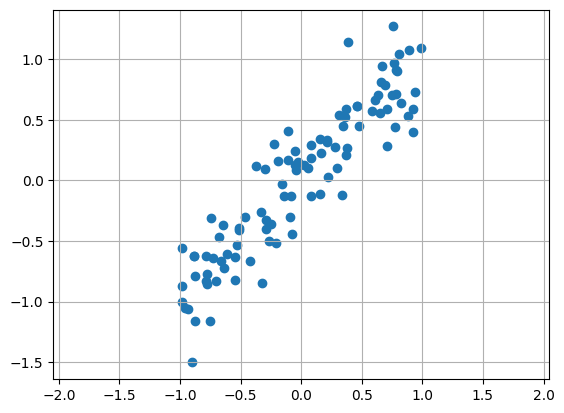

In [6]:
def create_dummy_data():
    # create a dummy dataset by sampling x uniformly from [-1, 1] and y = x + noise
    x = np.random.uniform(-1, 1, 100)
    y = x + np.random.normal(0, 0.25, 100)
    return x, y

# plot the dummy data set

x, y = create_dummy_data()
plt.scatter(x, y)
plt.axis('equal')
plt.grid()
plt.show()

Note the high correlation between the (x, y) axes!

## Step 2: Let's create our data matrix:

[7.98416835 1.54870666]
[[ 0.68494303  0.72859663]
 [-0.72859663  0.68494303]]


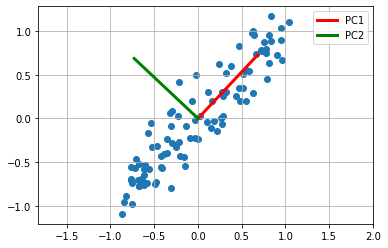

In [26]:
# concatenenate the x and y vectors into a n by 2 matrix
X = np.vstack((x, y)).T

# remove the mean of each feature
X = X - np.mean(X, axis=0)

# compute PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.singular_values_)
print(pca.components_)

# overlay the principal components on the data
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.plot([0, pca.components_[0, 0]], [0, pca.components_[0, 1]], 'r', linewidth=3, label='PC1')
plt.plot([0, pca.components_[1, 0]], [0, pca.components_[1, 1]], 'g', linewidth=3, label='PC2')
plt.axis('equal')
plt.legend()
plt.show()


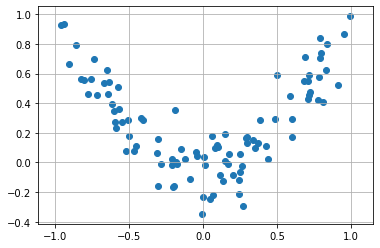

In [29]:
# generate a new dataset using a second order polynomial
def create_polynomial_data():
    x = np.random.uniform(-1, 1, 100)
    y = x**2 + np.random.normal(0, 0.15, 100)
    return x, y

# plot the dummy data set

x, y = create_polynomial_data()
plt.scatter(x, y)
plt.axis('equal')
plt.grid()
plt.show()

[5.28047123 3.11293422]
[[ 0.99897527  0.04525942]
 [-0.04525942  0.99897527]]


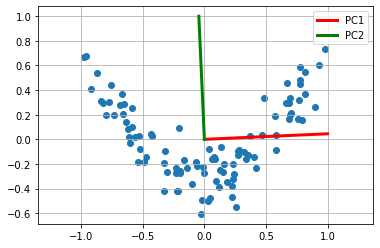

In [30]:
# concatenenate the x and y vectors into a n by 2 matrix
X = np.vstack((x, y)).T

# remove the mean of each feature
X = X - np.mean(X, axis=0)

# compute PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.singular_values_)
print(pca.components_)

# overlay the principal components on the data
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.plot([0, pca.components_[0, 0]], [0, pca.components_[0, 1]], 'r', linewidth=3, label='PC1')
plt.plot([0, pca.components_[1, 0]], [0, pca.components_[1, 1]], 'g', linewidth=3, label='PC2')
plt.axis('equal')
plt.legend()
plt.show()

Note that now, PCA does a much worse job of summarizing the data. Why? Because the data no longer is well approximated as a linear sum of principle components. You can imagine how this gets much worse when we deal with images as they are much more complex signals.